# Régression polynomiale simple

In [180]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [181]:
x, y = make_regression (n_samples=200, n_features=1, noise=10)
y = y + abs(y/2)

y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)
print(x)
print(y)

(200, 1)
(200, 1)
[[ 1.10369589e+00]
 [ 8.50701806e-04]
 [-4.31262678e-01]
 [ 1.10320495e+00]
 [ 1.54234037e-02]
 [ 1.80717054e+00]
 [ 1.26608284e+00]
 [ 1.49379682e+00]
 [ 2.09632539e+00]
 [ 5.03587355e-01]
 [ 7.27257591e-01]
 [-2.81365898e-01]
 [ 5.31943051e-01]
 [-1.34196215e+00]
 [-2.37701606e-01]
 [-2.52487168e+00]
 [ 3.05864980e-01]
 [ 3.86217142e-01]
 [ 1.22778486e+00]
 [ 4.59457077e-01]
 [ 7.60394432e-02]
 [ 1.39290012e+00]
 [ 1.96036903e+00]
 [ 8.01288460e-01]
 [-5.09853942e-01]
 [-1.96756623e+00]
 [ 2.07032764e-02]
 [ 5.04527334e-01]
 [-5.36624943e-01]
 [ 2.33517050e-01]
 [ 4.31187153e-02]
 [ 1.60899924e+00]
 [ 6.35800800e-01]
 [ 7.85304724e-01]
 [-3.39870395e-01]
 [ 1.13590204e+00]
 [-1.51730819e+00]
 [ 1.12805915e+00]
 [-4.77138097e-01]
 [-4.84963001e-01]
 [-4.36839436e-01]
 [ 4.18471270e-01]
 [-5.17526490e-02]
 [ 5.22335175e-01]
 [ 5.93039103e-01]
 [ 2.12865013e+00]
 [ 5.64734217e-01]
 [ 4.47776000e-01]
 [ 5.78189937e-01]
 [ 6.60401917e-01]
 [-3.19067701e-01]
 [ 4.04149977

In [182]:
# Représentation graphique du modèle
plt.scatter(x,y)

## Modèle

In [183]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [184]:
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [185]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression polynômiale 

In [186]:
#on va utiliser une régression polynomiale, car cette dernière imite de manière plus fidèle une courbe
#contrairement à un modèle de régression linéaire qui est plus efficace pour les fonctions affines.
theta_pol = np.random.randn(3,1)
print(theta_pol.shape)
print(theta_pol)

(3, 1)
[[-1.84788034]
 [ 0.69387685]
 [ 0.05116299]]


In [187]:
X_pol = np.hstack((x**2, x, np.ones(x.shape)))
print(X_pol.shape)
print(X_pol)

(200, 3)
[[ 1.21814461e+00  1.10369589e+00  1.00000000e+00]
 [ 7.23693562e-07  8.50701806e-04  1.00000000e+00]
 [ 1.85987498e-01 -4.31262678e-01  1.00000000e+00]
 [ 1.21706116e+00  1.10320495e+00  1.00000000e+00]
 [ 2.37881382e-04  1.54234037e-02  1.00000000e+00]
 [ 3.26586536e+00  1.80717054e+00  1.00000000e+00]
 [ 1.60296576e+00  1.26608284e+00  1.00000000e+00]
 [ 2.23142895e+00  1.49379682e+00  1.00000000e+00]
 [ 4.39458012e+00  2.09632539e+00  1.00000000e+00]
 [ 2.53600224e-01  5.03587355e-01  1.00000000e+00]
 [ 5.28903604e-01  7.27257591e-01  1.00000000e+00]
 [ 7.91667684e-02 -2.81365898e-01  1.00000000e+00]
 [ 2.82963410e-01  5.31943051e-01  1.00000000e+00]
 [ 1.80086242e+00 -1.34196215e+00  1.00000000e+00]
 [ 5.65020536e-02 -2.37701606e-01  1.00000000e+00]
 [ 6.37497702e+00 -2.52487168e+00  1.00000000e+00]
 [ 9.35533858e-02  3.05864980e-01  1.00000000e+00]
 [ 1.49163681e-01  3.86217142e-01  1.00000000e+00]
 [ 1.50745566e+00  1.22778486e+00  1.00000000e+00]
 [ 2.11100806e-01  4.5

In [188]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X_pol, y, theta_pol, 0.01, 1000)
newThetaPol = resultDescenteGradientPol[0]
varCoutPol = resultDescenteGradientPol[1]

print(newThetaPol.shape)
print(newThetaPol)

(3, 1)
[[ 8.40052237]
 [39.89516229]
 [ 7.78457207]]


[[ 62.04974968]
 [  7.81851703]
 [ -7.85833033]
 [ 62.02106212]
 [  8.40188959]
 [107.31690904]
 [ 71.76090226]
 [ 86.12500756]
 [128.33458218]
 [ 30.00564567]
 [ 41.24169826]
 [ -2.77552388]
 [ 31.38356689]
 [-30.62504074]
 [ -1.22392533]
 [-39.39245643]
 [ 20.77300238]
 [ 24.44582045]
 [ 69.43066322]
 [ 27.88804378]
 [ 10.86674979]
 [ 79.65299612]
 [118.27741279]
 [ 45.14577148]
 [-10.37240914]
 [-38.190718  ]
 [  8.61413332]
 [ 30.05110669]
 [-11.20509953]
 [ 17.55885494]
 [  9.52041866]
 [ 93.72379025]
 [ 36.54579763]
 [ 44.29506312]
 [ -4.80425233]
 [ 63.94053951]
 [-33.40879904]
 [ 63.47848647]
 [ -9.33846042]
 [ -9.58739418]
 [ -8.04014743]
 [ 25.95063571]
 [  5.74239116]
 [ 30.91516705]
 [ 34.39838822]
 [130.77145318]
 [ 32.99386967]
 [ 27.3330011 ]
 [ 33.65987835]
 [ 37.79513935]
 [ -4.08947722]
 [ 25.28031881]
 [-15.766808  ]
 [-36.06764547]
 [-15.53110996]
 [-16.43906557]
 [  1.70061552]
 [ 16.22596529]
 [-20.60901433]
 [ -7.31486428]
 [-35.81747704]
 [-12.53546196]
 [ 64.63

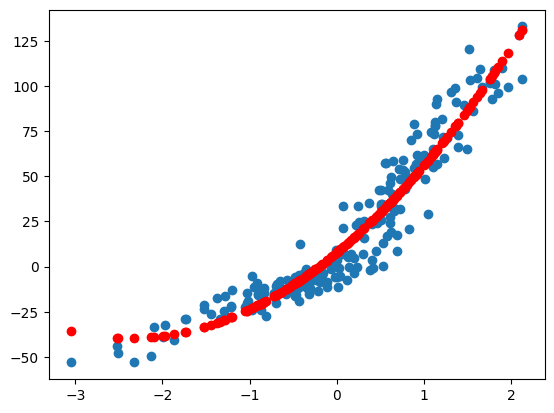

In [189]:
y_predictions_pol = model(X_pol, newThetaPol)
print(y_predictions_pol)
plt.scatter(x, y)
plt.scatter(x, y_predictions_pol, c='red')

In [190]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCoutPol)

In [191]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions_pol)
print(coeffPredictions_pol)

0.9200502024132261
